In [69]:
import pandas as pd
from sklearn.cluster import KMeans
import os
import sys
import math
import time
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib import cm, colors
import copy
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix
from docplex.mp.model import Model
from docplex.util.environment import get_environment
from docplex.mp.progress import *
%matplotlib inline
palette = sns.color_palette("bright", 10)

In [81]:
dat=pd.read_csv('D:/newedata/6month.csv')
df=dat[(dat['ACORN_Category']!= 0) & (dat['ACORN_Category']!= 6)]
# sampled_df=df.groupby('ACORN_Category', group_keys=False).apply(lambda x: x.sample(200,random_state=1))
n=2000
sampled_df=df.sample(n=n)
sampled_df1=sampled_df.reset_index(drop=True)
sampled_df1.to_csv("final_1000.csv")
df_X=sampled_df1.loc[:, sampled_df.columns.str.contains('X')]

In [71]:
silhouette = []
kmax = 12

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(df_X)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(df_X, labels, metric = 'euclidean'))

In [72]:
silhouette

[0.4899184057142991,
 0.3738101717143057,
 0.3453536403480341,
 0.2331618381526579,
 0.22652726776801815,
 0.17742106931383939,
 0.18080357008252115,
 0.1694779800711969,
 0.15279410990641099,
 0.1684200006686471,
 0.16505075390388732]

In [174]:
#First do a K-means algorithm
KK=9
kmeans = KMeans(n_clusters=KK, random_state=0).fit(df_X)

In [175]:
sampled_df2=copy.deepcopy(sampled_df1)
sampled_df2['label']=kmeans.labels_

In [257]:
sampled_df2['label'].value_counts().to_csv('k_means_2000_9_value_count.csv')

In [258]:
pd.DataFrame(kmeans.cluster_centers_).to_csv('k_means_2000_9_center_lines.csv')

In [176]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]

In [177]:
c1

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [208]:
def label_transform(x):
    if x in (1, 2, 3):
        return 'H'
    if x in (52, 53, 54):
        return 'L'
    return 'O'

In [236]:
def label_to_color(x):
    if x in (1,2,3):
        return c4
    if x in (52,53,54):
        return c1
    return c5

In [245]:
def label_to_alphas(x):
    if x in (1,2,3):
        return 1
    if x in (52,53,54):
        return 1
    return 0.4

In [246]:
sampled_df2['color'] = sampled_df2['ACORN_Type'].apply(lambda x:label_to_color(x))
sampled_df2['plot'] = sampled_df2['ACORN_Type'].apply(lambda x:label_transform(x))
sampled_df2['alphas'] = sampled_df2['ACORN_Type'].apply(lambda x:label_to_alphas(x))

In [247]:
sampled_df2['color']

0       (0.5803921568627451, 0.403921568627451, 0.7411...
1       (0.5803921568627451, 0.403921568627451, 0.7411...
2       (0.5803921568627451, 0.403921568627451, 0.7411...
3       (0.8392156862745098, 0.15294117647058825, 0.15...
4       (0.8392156862745098, 0.15294117647058825, 0.15...
                              ...                        
1995    (0.5803921568627451, 0.403921568627451, 0.7411...
1996    (0.8392156862745098, 0.15294117647058825, 0.15...
1997    (0.5803921568627451, 0.403921568627451, 0.7411...
1998    (0.5803921568627451, 0.403921568627451, 0.7411...
1999    (0.5803921568627451, 0.403921568627451, 0.7411...
Name: color, Length: 2000, dtype: object

In [248]:
colors=sampled_df2['color']
alphas=sampled_df2['alphas']
plots=sampled_df2['plot']

In [249]:
len(kmeans_sampled_df2)

2000

In [250]:
kmeans_sampled_df2=sampled_df2.loc[:, sampled_df2.columns.str.contains('X') |sampled_df2.columns.str.contains('label') |sampled_df2.columns.str.contains('ACORN_Type')]
kmeans_sampled_df2.head()

,X2009.07.24,X2009.07.25,X2009.07.26,X2009.07.27,X2009.07.28,X2009.07.29,X2009.07.30,X2009.07.31,X2009.08.01,X2009.08.02,...,X2009.12.13,X2009.12.14,X2009.12.15,X2009.12.16,X2009.12.17,X2009.12.18,X2009.12.19,X2009.12.20,ACORN_Type,label
0,12.710,14.842,12.926,15.661,11.760,14.954,13.673,16.115,13.931,13.338,...,13.026,12.147,11.972,10.271,14.113,10.563,13.244,14.215,44,6
1,13.000,9.830,12.840,13.590,10.100,13.020,16.450,10.410,16.990,8.690,...,22.190,28.840,27.470,31.080,27.030,29.660,35.020,30.310,5,3
2,4.917,7.580,3.755,5.276,4.290,4.854,4.774,4.190,5.406,6.408,...,5.941,5.293,4.938,4.026,4.654,4.320,4.953,8.196,19,1
3,14.150,11.850,19.620,14.180,11.220,19.550,14.230,9.140,3.070,3.090,...,24.750,33.930,18.050,10.730,19.970,14.760,18.200,19.170,2,3
4,6.034,4.943,4.877,5.264,6.106,6.453,6.313,5.306,5.529,5.670,...,11.832,15.673,11.952,11.061,11.152,11.127,12.099,10.338,1,4


In [251]:
pd.crosstab(kmeans_sampled_df2['label'],kmeans_sampled_df2['ACORN_Type']).to_csv('label_ACORN2000_12_k_means.csv')

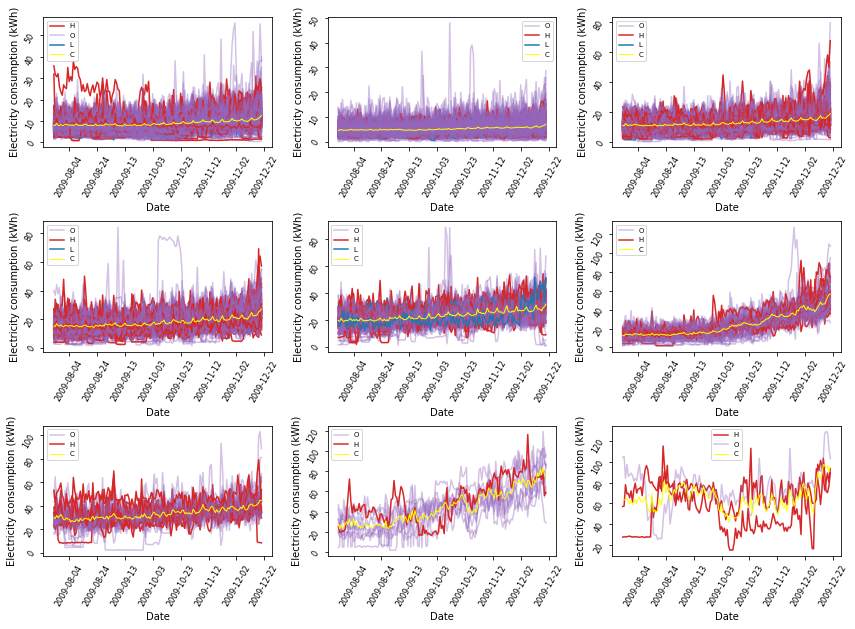

In [254]:
dat_L=kmeans_sampled_df2
ALL_ACORN_Type=set(kmeans_sampled_df2['ACORN_Type'].value_counts().values)
labels=kmeans_sampled_df2['label'].value_counts().index.tolist()
titles=['Pattern 1','Pattern 2','Pattern 3','Pattern 4','Pattern 5','Pattern 6','Pattern 7','Pattern 8','Pattern 9']
y_mean=[]
#fig, ax = plt.subplots(nrows=3, ncols=2)
#fig.set_size_inches(20,15)
#norm = colors.Normalize(vmin=min(ALL_ACORN_Type), vmax=max(ALL_ACORN_Type))
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.brg)

fig = plt.figure()
fig.set_size_inches(12,9)
for c,num in zip(labels, range(1,10)):
    df0=dat_L[dat_L['label']==c]
    df0T=df0.drop('label',axis=1).T
    ACORN_Type=df0T.loc['ACORN_Type',:].values
    df0T=df0T.drop('ACORN_Type',axis=0)
    df0T.index=pd.date_range(start='7/24/2009', end='12/20/2009')
    col=df0T.shape[1]
    df0T['Mean']=df0T.mean(axis=1)
    df0T['Date']=pd.to_datetime(df0T.index,infer_datetime_format=True)
    ax = fig.add_subplot(3,3,num)
    for i in range(col):
        #ax.plot(df0T['Date'], df0T.iloc[:,i],color=mapper.to_rgba(ACORN_Type[i]))
        ax.plot(df0T['Date'], df0T.iloc[:,i],color=colors[df0T.columns[i]],alpha=alphas[df0T.columns[i]],label=plots[df0T.columns[i]])
    ax.plot(df0T['Date'], df0T['Mean'],color='yellow',linewidth=1,label='C')
    y_mean.append(df0T['Mean'].mean())
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    #my_y_ticks = np.arange(0, 130, 20)
    #plt.yticks(my_y_ticks)
    ax.tick_params(axis='both', which='major', labelsize=8)
    #ax.set_ylim(0,80)
    #ax.set_title(titles[c-1])
    ax.tick_params(labelrotation=60)
    plt.ylabel('Electricity consumption (kWh)')
    plt.xlabel('Date')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),prop={'size': 7})
    #ax.legend(loc = 'best')

# plt.xlabel('Date')
# handles, labels = ax.get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
#plt.ylabel('Electricity consumption(KWh)')

#fig.suptitle('Residential daily electricity patterns based on Partitioning Around Medoids algorithms (k=5)',fontsize=25)
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()